# Анализ стартапа пользователей мобильного приложения, который продаёт продукты питания. Изучение воронки продаж. Исследование результатов A/A/B эсперимента.

# Описание проекта:

Я работаю в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.

Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, мы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работаем с одними и теми же данными. Исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

# Описание данных:

**Каждая запись в логе — это действие пользователя, или событие.**
- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

# План по выполнению проекта:

**Шаг 1. Откройте файл с данными и изучите общую информацию**
 
 Путь к файлу: `/datasets/logs_exp.csv`. Скачать датасет

**Шаг 2. Подготовьте данные**
1. Замените названия столбцов на удобные для вас;
2. Проверьте пропуски и типы данных. Откорректируйте, если нужно;
3. Добавьте столбец даты и времени, а также отдельный столбец дат;
**Шаг 3. Изучите и проверьте данные**
1. Сколько всего событий в логе?
2. Сколько всего пользователей в логе?
3. Сколько в среднем событий приходится на пользователя?
4. Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
5. Много ли событий и пользователей вы потеряли, отбросив старые данные?
6. Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.
**Шаг 4. Изучите воронку событий**
1. Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
2. Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
3. Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
4. По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
5. На каком шаге теряете больше всего пользователей?
6. Какая доля пользователей доходит от первого события до оплаты?
**Шаг 5. Изучите результаты эксперимента**
1. Сколько пользователей в каждой экспериментальной группе?
2. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
3. Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
4. Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
5. Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

**Цель исследования**: - Исследуем гипотезы, изучим поведение пользователей мобильного приложения.

Нам предстоит выяснить изучить:
- Как пользователи доходят до покупки?
- Сколько пользователей доходит до покупки, сколько «застревает» на предыдущих шагах и на каких?
- Исследуем результаты A/A/B экспериментаю.
- Выясним какой шрифт лучше после изменения дизайна.

**Ход исследования**:

Данные для работы мы получаем из файла `/datasets/logs_exp.csv`.

О качестве данных  ничего не известно. Поэтому перед проверкой гипотиз проведём обзор данных.
Проверим данные и оценим их влияние на исследование. Исправим критические ошибки в данных, если они есть.

Исследование произведём в несколько этапов:

1. Проверка данных
2. Изучение воронки событий
3. Изучение результатов эксперимента

### Откроем файл с данными и изучим общую информацию: 

Загрузим данные для исследования 

**Путь к файлам**:
-  `/datasets/logs_exp.csv` - файл с данными

#### Загружаем необходимые библиотеки:

In [56]:
# Импортируем необходимые модули для работы
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import math as mth
# При использованиии некоторых атрибутов могут показываться предупреждения, чтобы такого не было, уберём их
import warnings
warnings.filterwarnings('ignore')

#### Загрузим данные в переменные:

In [57]:
# загрузим датасет в переменную data, применим разделитель sep='\t'
try:data = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv',sep='\t')
except:data = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv',sep='\t')

#### Выведем информацию о данных на экран о данных:

In [58]:
# Выводим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [59]:
# Посмотрим на таблицу в целом
display(data)
# Откроем полное содержимое
pd.options.display.max_colwidth = 210

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**Вывод**: Файл открывается корректно, применили разделитель sep='\t'. Необходимо Изменить тип данных столбца EventTimestamp с int64 на to_datetime. Отредактировать данные.   

### Подготовим данные:

#### Заменим название столбцов на удобные для нас:

In [60]:
# Приведём названия колонок в нижний регистр для удобства
data.columns = data.columns.str.lower()
# переименуем названия колонок и сделаем змеиный стиль
data = data.rename(columns={'eventname': 'event_name', 'deviceidhash': 'uid', 'eventtimestamp': 'date_time', 'expid': 'groups' })
# проверим изменения
display(data.head(2))

,event_name,uid,date_time,groups
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


#### Проверим пропуски , дубликаты и типы данных. Откорректируем, если нужно.

##### Проверим пропуски , дубликаты и типы данных

In [61]:
# Проверяем пропуски, применим атрибут isna() 
data.isna().sum()

event_name    0
uid           0
date_time     0
groups        0
dtype: int64

In [62]:
# посмотрим сколько строк
data.shape[0]

244126

In [63]:
# Проверим дубликаты и если они есть, удалим их 
data.duplicated().sum()

413

In [64]:
# удалим дубликаты их не много, они на исследование не повлияют
data = data.drop_duplicates().reset_index(drop=True)

In [65]:
# проверим, всё ли мы удалили
data.duplicated().sum()

0

##### Откорректируем тип данных:

In [66]:
# переведём дату и время в формат to_datetime, укажем unit='s', чтобы перевести из секунд
data['date_time'] = pd.to_datetime(data['date_time'], unit='s')

In [67]:
# посмотрим что  получилось
display(data.head(5))

,event_name,uid,date_time,groups
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


#### Добавим столбец даты и времени, а также отдельный столбец дат:

In [68]:
# Столбец с датой и временем у нас уже есть, добавим стобец с датой.
data['date'] = data['date_time'].astype('datetime64[D]')

In [69]:
# Проверим всё ли у нас получилось
display(data.head(5))

,event_name,uid,date_time,groups,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


**Вывод**: Данные к работе подготовили.
- Проверили на наличие дубликатов и наличие пропусков.
- Изменили фрмат даты и времени с `intn64` на `to_datetime`, применили атрибут `unit='s'`, чтобы перевести перевод из секунд.
- Переименовали столбцы для удобства работы.
- Создали столбец `date` с датой.

### Изучим проверенные данные:

#### Узнаем сколько всего событий в логе?

In [70]:
# события в логе 
print('Всего событий в логе:', data['event_name'].shape[0])

Всего событий в логе: 243713


#### Узнаем сколько всего пользователей в логе?

In [71]:
# всего пользователей в логе 
print('Всего пользователей:', data['uid'].unique().shape[0])

Всего пользователей: 7551


#### Сколько в среднем событий приходится на пользователя?

In [72]:
# приходится в среднем на пользователя
print("В среднем события на пользователя: %d " % (data.shape[0] / data['uid'].unique().shape[0]))

В среднем события на пользователя: 32 


#### Данными за какой период мы располагаем? Найдём максимальную и минимальную дату.

In [73]:
# Минимальная дата 
print('Дата начала:' , data['date_time'].min())
# Максимальная дата
print('Дата окончания:', data['date_time'].max())

Дата начала: 2019-07-25 04:43:36
Дата окончания: 2019-08-07 21:15:17


Данные нам доступны с 2019-07-25 по 2019-08-27 . Примерно за месяц.

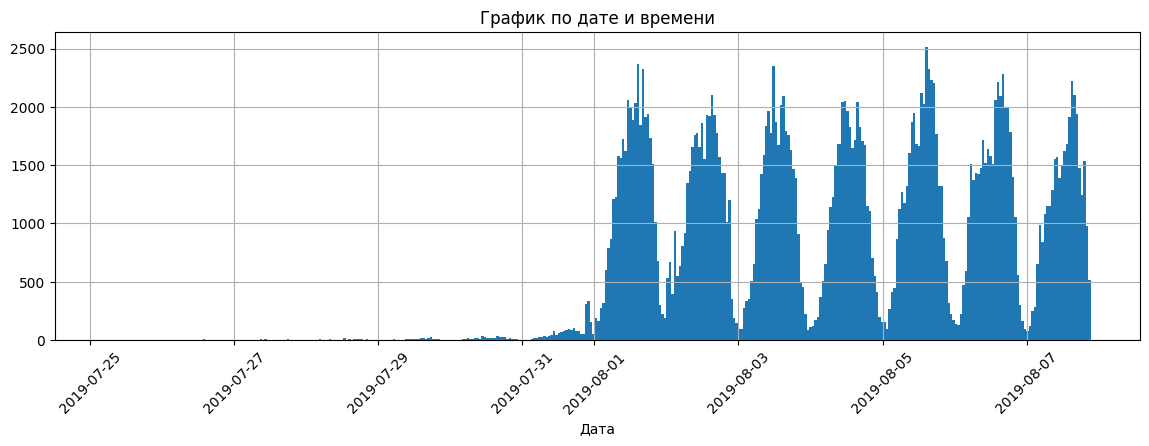

In [74]:
# Построим гистограмму распределния по дате и времени, выберем полные данные для исследования
plt.plot
data['date_time'].hist(figsize=(14, 4), grid=True, bins = 400)
plt.title('График по дате и времени')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

Данные у нас за весь период не полные. На графике чётко видна целостность данных  с событиями. Возьмём события начиная с 2019-08-01, но поскольку данные могут доезжать, туда и войдут данные 2019-07-31.

In [75]:
# Ненужные данные по  дате отбросим 
df = data.loc[data['date_time'] >= '2019-07-31']

In [76]:
# Проверим, что у нас получилось
display(df.head(5))

,event_name,uid,date_time,groups,date
796,MainScreenAppear,3670880358399219515,2019-07-31 01:11:46,247,2019-07-31
797,OffersScreenAppear,3799109751993694887,2019-07-31 01:21:04,248,2019-07-31
798,Tutorial,1126021718529336913,2019-07-31 01:32:11,247,2019-07-31
799,MainScreenAppear,4293428370257583636,2019-07-31 02:19:18,248,2019-07-31
800,MainScreenAppear,4567464647598975872,2019-07-31 02:33:30,247,2019-07-31


Мы выбрали полные данные, теперь определим их минимальную и максимальную дату, с которыми будем проводить исследования.

In [77]:
# Минимальная дата исследования 
print('Дата начала:' , df['date_time'].min())
# Максимальная дата исследования
print('Дата окончания:', df['date_time'].max())

Дата начала: 2019-07-31 01:11:46
Дата окончания: 2019-08-07 21:15:17


#### Много ли событий и пользователей мы потеряли, отбросив старые данные? Проверим

In [78]:
# Посмотрим, сколько событий было потеряно
# Создадим новый датафрейм
data_event = data.query('date <= "2019-07-31"')
print('Мы потеряли событий событий:', len(data_event['event_name']))

Мы потеряли событий событий: 2826


In [79]:
# посчитаем в процентах, сколько данных мы потеряли и округлим до трёх знаков после запятой
print('Потеряли событий:', round(len(data_event['event_name'])/len(data['event_name']), 3)*100, '%')

Потеряли событий: 1.2 %


Было потеряно примерно 1%  событий в данных, для того, чтобы проводить исследование такая цифра допускается.

In [80]:
# Старые пользователи 
print('Всего пользователей со старыми данными:', data['uid'].unique().shape[0])
# Пользователи с ощищенными данными 
print('Всего пользователей с новыми данными:', df['uid'].unique().shape[0])
# Найдём разницу в пользователях
print('Разница в пользователях:', (data['uid'].unique().shape[0] -df['uid'].unique().shape[0]))

Всего пользователей со старыми данными: 7551
Всего пользователей с новыми данными: 7542
Разница в пользователях: 9


#### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [81]:
# Найдём пользователей в наших экспериментальный группах
uid_groups = df.groupby('groups').agg({'uid': 'count'})
# Выведем на экран
display(uid_groups.sort_values(by='uid', ascending=True))

,uid
groups,
247,77686
246,79922
248,85309


В 248 группе самое большое количество пользователей, 85309(польз). В 247 группе 77686(польз) и в 246 группе  79922(польз), в этих 2ух группах примерно одинаковое количество пользователей. 

**Проверим:** не пересекаются ли пользователи в каждой группе между собой: 

In [82]:
# Создаим виртуальные группы (A,B,C) -> (247,246,248)
# Проверим пересечение, с помощью атрибута numpy.intersect1d 
A = df[df['groups']=='247']['uid']
B = df[df['groups']=='246']['uid']
C = df[df['groups']=='248']['uid']

# Посмотрим пересечение между группамми A и B
A_B = np.intersect1d(A, B)
print('Количество пересекающихся пользователей: A_B')
print(A_B.shape[0])

# Посмотрим пересечие между группами A и C
A_C = np.intersect1d(A, C)
print('Количество пересекающихся пользователей: A_C')
print(A_C.shape[0])

# Посмотрим пересечение между группами B и C 
B_C = np.intersect1d(B, C)
print('Количество пересекающихся пользователей: B_C')
print(B_C.shape[0])

Количество пересекающихся пользователей: A_B
0
Количество пересекающихся пользователей: A_C
0
Количество пересекающихся пользователей: B_C
0


Пользователи не пересекаются между собой, можем продолжить исследование.

**Вывод:** На данном этапе мы подготовили данные более детально:

- Проверили логи, узнали сколько всего событи по неочищенным данным .Всего событий в логе: 243713
- Узнали сколько всего пользователей по неочищенным данным. Всего пользователей со старыми данными: 7551
- Посчитали сколько в среднем собтий приходится на пользователя. В среднем событий приходится на пользователя : 32 
- Проверили пользователей на пересечие между собой. Пользователи не пересекаются.
- Выбрали дату исследования. Дата начала: `2019-07-31 01:11:46`.Дата окончания: `2019-08-07 21:15:17`.
                            


### Изучим воронку событий:

#### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [83]:
# Найдём события, которые есть в логах
event_groups = df.groupby('event_name').agg({'uid': 'count'})
# Выведем на экран, отсортируем в порядке возрастания
display(event_groups.sort_values(by='uid', ascending=False))

,uid
event_name,
MainScreenAppear,118578
OffersScreenAppear,46707
CartScreenAppear,42560
PaymentScreenSuccessful,34058
Tutorial,1014


**Вывод:** По частоте событий пользователи сперва обращают внимание: В логе 5 событий. 
1. MainScreenAppear(ГлавныйЭкранПоявление) 
2. OffersScreenAppear(ПредложениеЭкранПоявление)
3. CartScreenAppear(КорзинаЭкранПоявление)
4. PaymentScreenSuccessful(Оплата)
5. Tutorial(обучение)

#### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

##### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. 

In [84]:
# Найдём сколько пользователей совершали каждое из этих событий 
users_event = df.groupby('event_name',as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False)
# Выводим на экран
display(users_event.sort_values(by='uid', ascending=False))

,event_name,uid
1,MainScreenAppear,7429
2,OffersScreenAppear,4606
0,CartScreenAppear,3742
3,PaymentScreenSuccessful,3542
4,Tutorial,845


##### Посчитаем долю пользователей, которые хоть раз совершали событие.

In [85]:
# Найдём долю пользователей в процентах и округлим до четырёх знаков после запятой
users_event['percent'] = round(users_event['uid']/len(df['uid'].unique()), 4) * 100
# Выводим на экран таблицу
display(users_event) 

,event_name,uid,percent
1,MainScreenAppear,7429,98.50
2,OffersScreenAppear,4606,61.07
0,CartScreenAppear,3742,49.62
3,PaymentScreenSuccessful,3542,46.96
4,Tutorial,845,11.20


In [86]:
# Построим воронку событий и отобразим всё на графике
# Доли пользователей в процентах 
fig = go.Figure(go.Funnel(
    y = users_event['event_name'],
    x = users_event['percent'],
    textinfo = "value+percent total"))                
fig.update_layout(
     title={
         'text': "Доля пользователей по событиям"})
fig.show()

#### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Рассмотрим более детально события, которые фигурируют в нашем датафрейме и составим воронку продаж. Посмотрим, какие действия предположительно могут быть обязательными а какие нет.

**Рассмотри обязательные события и сразу составим цепочку по пунктам:**

1. Пользователь попадает на главный экран (MainScreenAppear) занимает больше всего процентов (98.50%)
2. Пользователь видит экран с предложением (OffersScreenAppear) (61.07%)
3. Пользователь видит корзину с предложением (CartScreenAppear) (49.62%)
4. Далее производится оплата (PaymentScreenSuccessful) (46.96)

   У нас есть ещё одно событие 'Обучение'(Tutorial)(11.20%) - оно рассказывает нам, как пользоваться сайтом, но не все пользователи его
проходят, а лишь самая малость, так как кому-то это не интересно. Это показывает процент данного события.
   После оплаты уже нет смысла проходить обучение, так как вероятно пользователь уже знает как пользоваться сайтом, раз уже оплатил. Поэтому данное событие в цепочку воронки мы включать не будем.

In [87]:
# Создадим переменную воронку с новыми данными и уберём Tutorial 
funnel_event = users_event.query('event_name != "Tutorial"')
# Выведем на экран
display(funnel_event)

,event_name,uid,percent
1,MainScreenAppear,7429,98.50
2,OffersScreenAppear,4606,61.07
0,CartScreenAppear,3742,49.62
3,PaymentScreenSuccessful,3542,46.96


#### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [88]:
# Для данного подсчёта применим атрибут Shift, создадим столбец bias который смещает значения на 1 шаг  
# с fill_Value = 0
funnel_event['bias'] = funnel_event['uid'].shift(1, fill_value=0)

In [89]:
# Выведем на экран
display(funnel_event)

,event_name,uid,percent,bias
1,MainScreenAppear,7429,98.50,0
2,OffersScreenAppear,4606,61.07,7429
0,CartScreenAppear,3742,49.62,4606
3,PaymentScreenSuccessful,3542,46.96,3742


In [90]:
# Далее найдём отношение по событиям, создадим столбец conversion
# Посчитаем процент конверсии для каждого этапа события и округлим до трёх  знаков 
# Разделим пользователей на смещение
funnel_event['conversion'] = (funnel_event['uid']/funnel_event['bias']).round(3) * 100
# удалим столбец bias, чтобы он нам не мешал 
funnel_event.drop(columns='bias',inplace=True)
# Выведем на экран
display(funnel_event)

,event_name,uid,percent,conversion
1,MainScreenAppear,7429,98.50,inf
2,OffersScreenAppear,4606,61.07,62.0
0,CartScreenAppear,3742,49.62,81.2
3,PaymentScreenSuccessful,3542,46.96,94.7


In [91]:
# Построим воронку событий и отобразим всё на графике
# Количество пользователей и проценты событий 
fig = go.Figure(go.Funnel(
    y = funnel_event['event_name'],
    x = funnel_event['uid'],
    textinfo = "value+percent previous + percent initial"))                
fig.update_layout(
     title={
         'text': "Соотношение пользователей по  событиям"})
fig.show()

**Вывод:** Посчитали разницу и выяснили:

- Главный экран видят видят 98.50 % пользователей 
- На экран с показом предложения попадает 62 % пользователей 
- До экрана корзины с предложением доходит 81.2 % 
- До экрана с оплатой доходят 94.7 % пользователей, почти все кто дошёл, производят  оплату

#### На каком шаге теряете больше всего пользователей?

**Посмотрим пользователей и выясним на каком шаге их теряется больше всего:**

1. Показ главного экрана 98.50% 
2. Экран с показом предложения: было 98.50 % , стало 62 % пользователей, очень много потеряли: 36.5%  
3. В корзину переходят 81.2 % пользователей, те кто уже выбрали товар, почти все переходят в корзину 
4. И оплату так же производят 94.7% , которые уже перешли из корзины, здесь тоже всё в порядке

- На шаге 2 теряется очень много пользователей. А именно, переход от главного экрана к экрану с показом предложения. Вероятно, пользователи не довольны главной страницей мобильного приложения или не на всех девайсах отображается корректно информация и видны кнопки.

#### Какая доля пользователей доходит от первого события до оплаты?

In [92]:
# возьмём нашу табличку для наглядности  
display(funnel_event)

,event_name,uid,percent,conversion
1,MainScreenAppear,7429,98.50,inf
2,OffersScreenAppear,4606,61.07,62.0
0,CartScreenAppear,3742,49.62,81.2
3,PaymentScreenSuccessful,3542,46.96,94.7


**Вывод:** Мы видим что на первом событии 98.50 % пользователей . А до последнего события ,до события оплаты дошло 46.9 % пользователей,
т.е. почти половину пользователей мы теряем, а именно 51,6 %. Это существенно сказывается на бюджете, который мы теряем из-за главного экрана просмотра в мобильном приложении.

### Изучим результаты эксперимента:

#### Сколько пользователей в каждой экспериментальной группе?

In [93]:
# Найдём сколько  пользователей в каждой экспериментальной группе
users_groups = df.groupby('groups').agg({'uid': 'nunique'}).sort_values(by='uid', ascending=True).reset_index()
# Выведем на экран 
display(users_groups)

,groups,uid
0,246,2485
1,247,2517
2,248,2540


**Вывод:** Мы нашли пользователей в группах:

**В экспериментальной группе:** 
- группа 248 составляет 2540 пользователей - данные пользователи с экспериментальным шрифтом.

**В контрольных  группах:**
- группа 246 составляет 2485 пользователей 
- группа 247 составляет 2517 пользователей 

#### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

In [94]:
# Найдём пользователей в группе 246 
# в событие уберём Tutorial(обучение)
gr_246 = df.query('groups == 246  & event_name != "Tutorial"')
# выводим на экран
display(gr_246['uid'].unique().shape[0])

2484

In [95]:
# Найдём пользователей в группе 247 
# в событие уберём Tutorial(обучение)
gr_247 = df.query('groups == 247  & event_name != "Tutorial"')
# выводим на экран
display(gr_247['uid'].unique().shape[0])

2516

In [96]:
# Найдём разницу между выборками 246 и 247 и выведем на экран 
print('Разница между пользователями в группах составляет: {:.3f}%' 
.format(100 - gr_246['uid'].unique().shape[0] / gr_247['uid'].unique().shape[0] * 100))

Разница между пользователями в группах составляет: 1.272%


**Вывод:** Разница между выборками 246 и 247 составляет приверно 1% : 

**Критерии успешного A/A-теста:**

- Количество пользователей в различных группах различается не более, чем на 1% .

В нашем случае количество пользователей в группах  различается примерно на 1% , считаю, что данные подходят для дальнейшего  изучения.

#### Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Вясним, корректно ли работает разбиение на группы?

In [97]:
# построим фрейм funnel_groups с помощью pivot_table
funnel_groups = df.pivot_table(index='event_name', columns='groups',                              
                               values='uid',aggfunc='nunique').sort_values(by=246, ascending=False)
# уберём столбец с Tutorial ( обучение), так как он не входит в воронку 
funnel_groups.drop(['Tutorial'], inplace=True)
# найдём пользоваттелей в общем совершивших событие из контрольных групп
funnel_groups['total_event'] = funnel_groups[246] + funnel_groups[247]
# Выведем на экран
display(funnel_groups)

groups,246,247,248,total_event
event_name,,,,
MainScreenAppear,2452,2479,2498,4931
OffersScreenAppear,1544,1526,1536,3070
CartScreenAppear,1267,1239,1236,2506
PaymentScreenSuccessful,1200,1159,1183,2359


**Самое популярное событие:**  Во всех группах:

'MainScreenAppear'(Показ  главного экрана)

In [98]:
# сделаем сложение двух  колонок, ряд 246 [0](выбираем первую колонку и всю её складываем с 247[1])
users_groups.loc[3] = ['total_event', users_groups.iloc[0]['uid']+ users_groups.iloc[1]['uid']]
# выводим на экран общее число
display(users_groups)

,groups,uid
0,246,2485
1,247,2517
2,248,2540
3,total_event,5002


In [99]:
# сделаем вместо колонок 0,1,2,3 индексы 246,247,248 и общщую сложения 246+247 
users_groups = users_groups.set_index(users_groups.columns[0])
# выведем на экран получившуюся таблицу
display(users_groups)

,uid
groups,
246,2485
247,2517
248,2540
total_event,5002


**Произведём проверка гипотез о равенстве долей:**

**Сформулируем нулевую и альтернативную гипотезы:**

•	H0: Между долями в группах нет разницы

•	H1: Нет оснований считать, что доли в группах  разные.

In [100]:
# Сделаем проверку гипотезу о равенстве долей и обернём её в функцию
def hypothesis_test(group1, group2, developments, alpha):
    # Выберем статистический уровень значимости равный alpha=0.05
    # Допустимо выбрать alpha от 0.01 до 0.05
    # события в первой группе    
    p1_name_event = funnel_groups.loc[developments, group1]
    # события во второй группе    
    p2_name_event = funnel_groups.loc[developments, group2]
    # пользователи в первой группе
    p1_uid = users_groups.loc[group1, 'uid']
    # пользователи во второй группе 
    p2_uid = users_groups.loc[group2, 'uid']
    # пропорция успехов в первой группе: 
    p1 = p1_name_event / p1_uid
    # пропорция успехов во второй группе:   
    p2 = p2_name_event / p2_uid
    # пропорция успехов в комбинированном датасете:
    p_combined  = (p1_name_event + p2_name_event) / (p1_uid + p2_uid)
    # разница пропорций в датасетах
    difference = p1 - p2
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined  * (1 - p_combined ) * (1/p1_uid + 1/p2_uid))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0,1)
    # Так как распределение статистики нормальное, вызовем метод cdf().
    # Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. 
    # Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    # выводим на экран получившееся значение с событием и округлим до 5 знаков после запятой  
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.5f}'.format(group1, group2, developments, p_value=p_value))
    
    # сравниваем p_value c alpha
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями в группах есть разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные')

In [101]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 246, 247, с событием и уровень значимости 
    hypothesis_test (246, 247, developments, 0.05)
    # выводим на экран
    print()    

Проверка для групп 246 и 247, событие: MainScreenAppear, p-значение: 0.58688
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 247, событие: OffersScreenAppear, p-значение: 0.27435
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 247, событие: CartScreenAppear, p-значение: 0.21306
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11211
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные выборки групп 246 и 247 разными.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста

#### Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [102]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 246, 248, с событием и уровень значимости
    hypothesis_test (246, 248, developments, 0.05)
    print()

Проверка для групп 246 и 248, событие: MainScreenAppear, p-значение: 0.34129
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 248, событие: OffersScreenAppear, p-значение: 0.22700
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 248, событие: CartScreenAppear, p-значение: 0.09942
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.22352
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные выборки групп 246 и 248 разными.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста

In [103]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 247, 248, с событием и уровень значимости 
    hypothesis_test (247, 248, developments, 0.05)
    # выводим на экран
    print()

Проверка для групп 247 и 248, событие: MainScreenAppear, p-значение: 0.68196
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 247 и 248, событие: OffersScreenAppear, p-значение: 0.91005
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 247 и 248, событие: CartScreenAppear, p-значение: 0.68838
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.70659
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные выборки  групп 247 и 248 разными.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста

In [104]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 'total_event', 248, с событием и уровень значимости 
    hypothesis_test ('total_event', 248, developments, 0.05)
    # выводим на экран
    print()

Проверка для групп total_event и 248, событие: MainScreenAppear, p-значение: 0.42897
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп total_event и 248, событие: OffersScreenAppear, p-значение: 0.44718
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп total_event и 248, событие: CartScreenAppear, p-значение: 0.23764
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп total_event и 248, событие: PaymentScreenSuccessful, p-значение: 0.62967
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные выборки объединённых групп и 248 разными.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста

**Вывод:** Из экспериментов можно сделать вывод, доли равны, значит экспериментальный шрифт в 248 группе ни как не влияет на эксперимент при alpha = 0.05

#### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитаем, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

##### Какой уровень значимости мы выбрали при проверке статистических гипотез выше?

Мы выбрал кртический уровень статистической значимости самый большой : 0.05 
Сдели это для того, чтобы не допустить ошибки второго рода, чтобы она сразу была видна при проверке гипотиз.
Статистическая значимость увеличилась, значит увеличился критический регион, при попадании в который нулевую гипотезу отвергают. Вероятность попасть в него стала больше — увеличилась вероятность ошибки первого рода. Если будет разница она будет видна сразу. 

##### Посчитаем, сколько проверок статистических гипотез мы сделали. 

**Между выборками:**  

(246/247) - 4 проверки
                  
(246/248) - 4 проверки 
 
(247/248) - 4 проверки

(247+246/248) - 4 проверки 

**Вывод**: Мы сделали 16 проверок статистических гипотиз.

##### При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Изменим уровень статистической значимости и сравним его с мощностью.Проделаем всё тоже самое . Применим статистическую значимость: 0.1

In [105]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 246, 247, с событием, и уровень значимости 
    hypothesis_test (246, 247, developments, 0.1)
    # выводим на экран
    print()

Проверка для групп 246 и 247, событие: MainScreenAppear, p-значение: 0.58688
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 247, событие: OffersScreenAppear, p-значение: 0.27435
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 247, событие: CartScreenAppear, p-значение: 0.21306
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11211
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные выборки 246 и 247 разными при alfa = 0.1.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста

In [106]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 246, 248,с событием и уровень значимости
    hypothesis_test (246, 248, developments, 0.1)
    # выводим на экран
    print()

Проверка для групп 246 и 248, событие: MainScreenAppear, p-значение: 0.34129
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 248, событие: OffersScreenAppear, p-значение: 0.22700
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 246 и 248, событие: CartScreenAppear, p-значение: 0.09942
Отвергаем нулевую гипотезу: между долями в группах есть разница

Проверка для групп 246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.22352
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



In [107]:
# Найдём процент пользователей который переходит к оплате в группе 246 и выведем на экран 
print('Группа номер 246:', round(funnel_groups[246].iloc[2]/funnel_groups['total_event'].iloc[2], 2)*100, '% пользователей переходит к оплате')
# Найдём процент пользователей который переходит к оплате в группе 248 и выведем на экран 
print('Группа номер 248:', round(funnel_groups[248].iloc[2]/funnel_groups['total_event'].iloc[2], 2)*100, '% пользователей переходит к оплате') 

Группа номер 246: 51.0 % пользователей переходит к оплате
Группа номер 248: 49.0 % пользователей переходит к оплате


При увеличении alpha на 0.1 мы нашли ошибку первого рода. И отвергли нулевую гипотезу. В данном эксперименте изменение шрифта повлияло на статитстическую значимость между экспериментальной группой 248 и группой 246 на этапе показа экрана корзины. в 246 группе 51.0% пользователей переходят к оплате, а в группе 248: 49.0 % пользователей переходят к оплате.

In [108]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 247, 248, с событием и уровень значимости
    hypothesis_test (247, 248, developments, 0.1)
    # выводим на экран
    print()

Проверка для групп 247 и 248, событие: MainScreenAppear, p-значение: 0.68196
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 247 и 248, событие: OffersScreenAppear, p-значение: 0.91005
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 247 и 248, событие: CartScreenAppear, p-значение: 0.68838
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп 247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.70659
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные выборки 247 и 248 разными.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста

In [109]:
# Создадим функцию, получающая на вход порядковый номер группы в таблице и уровень значимости
# Выводит результаты проверки гипотез
for developments in funnel_groups.index:
    # наш тест и группы 'total_event', 248, с событием и уровень значимости 
    hypothesis_test ('total_event', 248, developments, 0.1)
    # выводим на экран
    print()

Проверка для групп total_event и 248, событие: MainScreenAppear, p-значение: 0.42897
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп total_event и 248, событие: OffersScreenAppear, p-значение: 0.44718
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп total_event и 248, событие: CartScreenAppear, p-значение: 0.23764
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные

Проверка для групп total_event и 248, событие: PaymentScreenSuccessful, p-значение: 0.62967
Не получилось отвергнуть нулевую гипотезу, нет оснований считать, что доли в группах разные



Мы видим из проверки гипотез о равенсве долей, нет оснований считать контрольные объединённых групп и 248 разными.Доли равные, значит контрольные группы выбраны верно. Можно приступать с этими группами к анализу A/B теста.

**Вывод:** При изменении уровня значимости можно можно получить  каждый десятый раз с ошибкой первого рода, мы это получили между группами 246 и 248. На этапе просмотра корзины произошли изменения, новый шрифт повлиял на переход пользоваталей к оплате в худшую сторону.246 группа = 51 %, 248 группа = 49 %

### Вывод:

**Поработали с данными:**

1. Произвели изучение общей информации по данным в датафрейме и подготовили данные к работе
2. Произвели изменение столбцов, обработали пропуски и убрали дубликаты
3. Произвели корректировку данных, изменили типы даты, создали необходимый столбец с датой для дальнейшей работы
4. Изучили данные, узнали что  всего в логе содежится:
-  Всего событий: 243713 
-  Всего пользователей:7551

5. В логе  есть 5 событий по действиям:
-  MainScreenAppear(ГлавныйЭкранПоявление)
-  OffersScreenAppear(ПредложениеЭкранПоявление)
-  CartScreenAppear(КорзинаЭкранПоявление)
-  PaymentScreenSuccessful(Оплата)
-  Tutorial(обучение) 

6. Подготовили данные для проверки гипотез, выбрали нужные полные данные и дату для исследования:
-  Дата начала: 2019-07-31 01:11:46.
-  Дата окончания: 2019-08-07 21:15:17

7. Определили воронку продажь с нужными событиями по популярности и как они происходят: 

-  MainScreenAppear(ГлавныйЭкранПоявление)
-  OffersScreenAppear(ПредложениеЭкранПоявление)
-  CartScreenAppear(КорзинаЭкранПоявление)
-  PaymentScreenSuccessful(Оплата)


   Не включали в воронку продаж Tutorial(Обучение) так как, очень малый процент пользователей только переходят на него, и находится в конце воронки, а такое быть не может, так как если пользователей уже оплатил, значит он знает как работать с приложением.


   Узнали что больше всего пользователей теряется на этапе показа главного  экрана, вероятно либо разрешение не подходит для гаджетов, либо пользователи не видят кнопок. Остальные пользователи кто прошёл этот этап почти полностью  переходят в корзину и оплачивают товар.
   
**Рассмотрели гипотизы и проверили разные уровни статистической значимости:**

1. При уровне alpha = 0.05, при проверке гипотиз разницы между двумя контрольными группами: 246 и 247 с 248 группой нету.
2. При уровне alpha = 0.1  при проверке гипотиз появляется разница между контрольной группой 246 и группой 248, измённый шрифт влияет на переход пользователей корзины в худшую сторону: 
- Группа номер 246: 51.0 % пользователей переходит к оплате
- Группа номер 248: 49.0 % пользователей переходит к оплате.

**Рекомендаци:**

В целом между группами и событиями разницы в долевом соотношении нет, вероятнее шрифт можно оставить так как в контрольных группах 246 и 247 не меняли его. Конверсия во всех  группах  остаётся одинаковой. А обратить внимание нужно на главный экран, с которого пользователи переходят на экран товаров, на этом этапе теряется  51,6 %. 